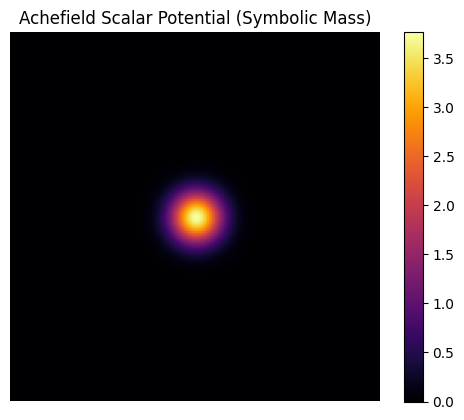

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, sobel, laplace

def generate_achefield_mass(shape=(128, 128), masses=[(64, 64, 4.0)], sigma=6):
    A = np.zeros(shape)
    for y0, x0, m in masses:
        rr, cc = np.ogrid[:shape[0], :shape[1]]
        radial = ((rr - y0)**2 + (cc - x0)**2)
        A += m * np.exp(-radial / (2 * sigma**2))
    return gaussian_filter(A, sigma=1.5)

A_mass = generate_achefield_mass()
plt.imshow(A_mass, cmap='inferno'); plt.title("Achefield Scalar Potential (Symbolic Mass)")
plt.colorbar(); plt.axis("off"); plt.show()


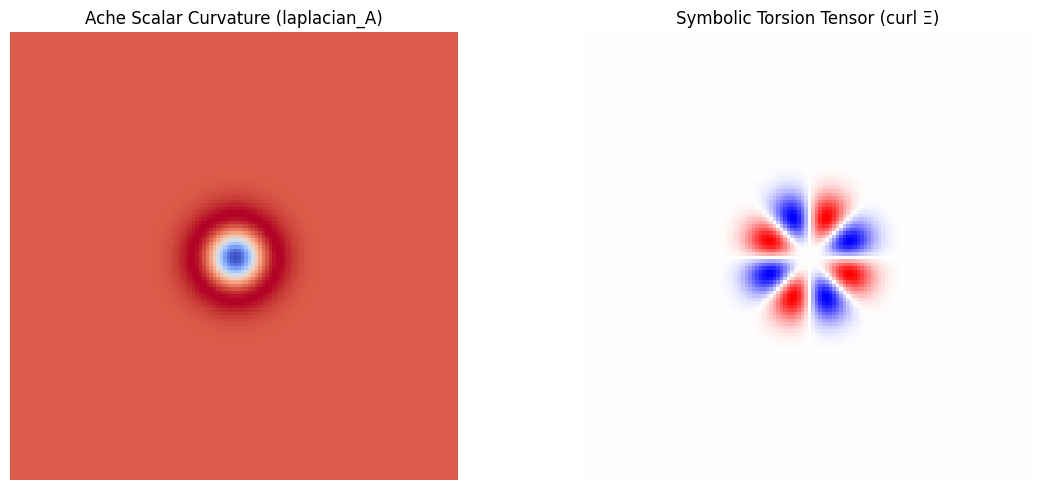

In [2]:
def compute_curvature_tensors(A):
    laplacian_A = laplace(A)  # Scalar curvature
    grad_x = sobel(A, axis=1)
    grad_y = sobel(A, axis=0)
    torsion = np.gradient(grad_y, axis=1) - np.gradient(grad_x, axis=0)  # symbolic curl
    return laplacian_A, torsion, grad_x, grad_y

R_scalar, T_torsion, Xi_x, Xi_y = compute_curvature_tensors(A_mass)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(R_scalar, cmap='coolwarm'); axs[0].set_title("Ache Scalar Curvature (laplacian_A)")
axs[1].imshow(T_torsion, cmap='bwr'); axs[1].set_title("Symbolic Torsion Tensor (curl Ξ)")
for ax in axs: ax.axis("off")
plt.tight_layout(); plt.show()


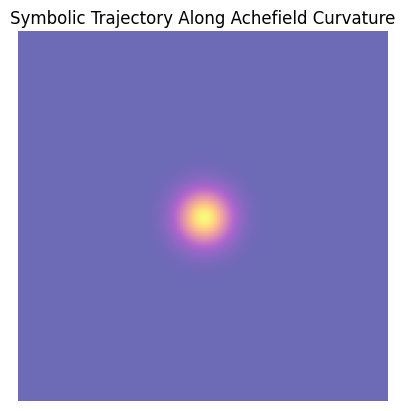

In [3]:
def trace_symbolic_path(Xi_x, Xi_y, start=(20, 20), steps=200, step_size=0.8):
    path = [np.array(start, dtype=float)]
    for _ in range(steps):
        y, x = int(path[-1][0]), int(path[-1][1])
        if not (0 <= y < Xi_x.shape[0] and 0 <= x < Xi_x.shape[1]): break
        dy, dx = Xi_y[y, x], Xi_x[y, x]
        norm = np.hypot(dy, dx) + 1e-6
        delta = step_size * np.array([dy, dx]) / norm
        path.append(path[-1] + delta)
    return np.array(path)

trajectory = trace_symbolic_path(Xi_x, Xi_y)
plt.imshow(A_mass, cmap='plasma', alpha=0.6)
plt.plot(trajectory[:,1], trajectory[:,0], color='cyan')
plt.title("Symbolic Trajectory Along Achefield Curvature")
plt.axis("off"); plt.show()
